Відрізок 1:
S_0(x) = 1.42 + -30.5464(x - 0.8) + -30.5464(x - 0.8)^2 + -30.5464(x - 0.8)^3, x належить [0.8, 0.9] 

Відрізок 2:
S_1(x) = 2.34 + 0.0349(x - 0.9) + 0.0349(x - 0.9)^2 + 0.0349(x - 0.9)^3, x належить [0.9, 1.2] 

Відрізок 3:
S_2(x) = 3.48 + 3.7145(x - 1.2) + 3.7145(x - 1.2)^2 + 3.7145(x - 1.2)^3, x належить [1.2, 1.6] 

Відрізок 4:
S_3(x) = 1.77 + 0.1322(x - 1.6) + 0.1322(x - 1.6)^2 + 0.1322(x - 1.6)^3, x належить [1.6, 2.1] 

Значення сплайна:
x = 0.80, y = 1.420
x = 0.81, y = 1.555
x = 0.83, y = 1.685
x = 0.84, y = 1.812
x = 0.85, y = 1.934
x = 0.87, y = 2.052
x = 0.88, y = 2.166
x = 0.89, y = 2.275
x = 0.91, y = 2.380
x = 0.92, y = 2.480
x = 0.93, y = 2.576
x = 0.94, y = 2.668
x = 0.96, y = 2.755
x = 0.97, y = 2.837
x = 0.98, y = 2.915
x = 1.00, y = 2.988
x = 1.01, y = 3.056
x = 1.02, y = 3.120
x = 1.04, y = 3.178
x = 1.05, y = 3.232
x = 1.06, y = 3.280
x = 1.08, y = 3.324
x = 1.09, y = 3.363
x = 1.10, y = 3.396
x = 1.12, y = 3.424
x = 1.13, y = 3.448
x = 1.14, y = 3.465


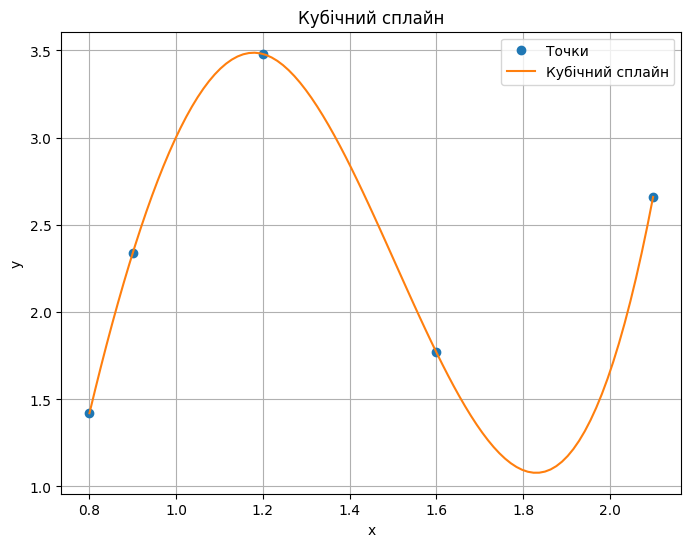

In [7]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Обчислення коефіцієнтів для кожного відрізка
# Задані точки (варіант №18)
x, y = np.array((0.8, 0.9, 1.2, 1.6, 2.1)), np.array((1.42, 2.34, 3.48, 1.77, 2.66))
n = len(x) - 1
h = np.diff(x)
a = y
b = c = d = mu = z = alpha = np.zeros(n) 
l = np.ones(n)

for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

for j in range(n - 2, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Виведення аналітичного вигляду кубічного сплайна для кожного відрізка
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}] \n")

# Побудова кубічного сплайна
cs = CubicSpline(x, y)

# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

# Роздрукуйте значення сплайна
print("Значення сплайна:")
for i in range(len(x_new)):
    print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")


# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()